# Automotive Repair Analysis (2024–2025)

## Мета
Оцінити ефективність роботи СТО, виявити відмінності між B2B і B2C клієнтами, а також виявити затримки, нестабільні процеси та сезонні тренди.

## Джерело даних
- Вивантаження з CRM: `repairs_2024.csv` + `repairs_2025.csv`
- Кількість записів: понад 60 тис.
- Поля: статус, дата створення/видачі, сервіс, послуга, тип клієнта (корпоративний/фізична особа)

## Кроки обробки
- Об'єднання датасетів;
- Створення коректної `дата_видачі`;
- Розрахунок `тривалість_днів`;
- Визначення регіону, місяця, року;
- Побудова аналітичних графіків.

---

## Основні графіки

### 1. Динаміка ремонтів по регіонах (2024 vs 2025)

### 2. % зміна кількості ремонтів (2025 vs 2024) по місяцях і типу клієнта

### 3. Середня тривалість ремонту по типу послуги

### 4. Boxplot: розподіл тривалості ремонтів по послугах


---

## Висновки

- Послуги з високою тривалістю: **ДВЗ, МКПП, Паливна** - понад 20 днів;
- Послуги з низькою стабільністю: **Карданний вал, Маховик** - великий розкид;
- Аномалії у "Діагностика" - ймовірне порушення у CRM (статус оновлюється неправильно);
- B2B-ремонти часто виконуються повільніше - потребують SLA та регламенту.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_2024 = pd.read_csv('../data/repairs_2024.csv')
data_2025 = pd.read_csv('../data/repairs_2025.csv')

In [3]:
repairs_2024 = data_2024.copy()
repairs_2025 = data_2025.copy()

In [4]:
repairs_2024.shape

(42325, 10)

In [5]:
repairs_2025.shape

(18044, 10)

In [6]:
repairs_2024.head()

,Назва,Дата створення,Дата змінення,Сервіс ремонту,Статус,Сервіс,Дата розрахунку,Співпрацю відновлено,Послуга,Корпоративний клієнт
0,V4OK,2024-09-17 14:24:13,2025-03-18 09:27:24,NaN,NaN,Київ 2,NaN,Ні,Карданний вал,Ні
1,S3444KI,2024-07-01 18:40:13,2025-02-28 10:45:40,NaN,Архів,Київ,2025-02-28,Ні,Сажа,Ні
2,P3281KI,2024-01-02 12:54:37,2024-01-30 22:49:07,NaN,Архів,Київ,NaN,Ні,Паливна,Ні
3,S592LV,2024-02-07 11:57:31,2024-03-19 18:50:31,NaN,Архів,Львів,NaN,Ні,Сажа,Ні
4,RE-R102AIF,2024-02-27 13:12:24,2024-03-16 12:33:40,NaN,Архів,A Івано-Франківськ,NaN,Ні,Рульова рейка,Ні


In [7]:
repairs_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42325 entries, 0 to 42324
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Назва                 42325 non-null  object 
 1   Дата створення        42325 non-null  object 
 2   Дата змінення         42325 non-null  object 
 3   Сервіс ремонту        0 non-null      float64
 4   Статус                42324 non-null  object 
 5   Сервіс                42301 non-null  object 
 6   Дата розрахунку       37211 non-null  object 
 7   Співпрацю відновлено  42325 non-null  object 
 8   Послуга               42320 non-null  object 
 9   Корпоративний клієнт  42325 non-null  object 
dtypes: float64(1), object(9)
memory usage: 3.2+ MB


In [8]:
repairs_2024.columns = repairs_2024.columns.str.strip(
).str.lower().str.replace(' ', '_')
repairs_2025.columns = repairs_2024.columns.str.strip(
).str.lower().str.replace(' ', '_')

In [9]:
repairs_all = pd.concat([repairs_2024, repairs_2025], ignore_index=True)

In [10]:
repairs_all.head()

,назва,дата_створення,дата_змінення,сервіс_ремонту,статус,сервіс,дата_розрахунку,співпрацю_відновлено,послуга,корпоративний_клієнт
0,V4OK,2024-09-17 14:24:13,2025-03-18 09:27:24,NaN,NaN,Київ 2,NaN,Ні,Карданний вал,Ні
1,S3444KI,2024-07-01 18:40:13,2025-02-28 10:45:40,NaN,Архів,Київ,2025-02-28,Ні,Сажа,Ні
2,P3281KI,2024-01-02 12:54:37,2024-01-30 22:49:07,NaN,Архів,Київ,NaN,Ні,Паливна,Ні
3,S592LV,2024-02-07 11:57:31,2024-03-19 18:50:31,NaN,Архів,Львів,NaN,Ні,Сажа,Ні
4,RE-R102AIF,2024-02-27 13:12:24,2024-03-16 12:33:40,NaN,Архів,A Івано-Франківськ,NaN,Ні,Рульова рейка,Ні


In [11]:
repairs_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60369 entries, 0 to 60368
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   назва                 60348 non-null  object 
 1   дата_створення        60369 non-null  object 
 2   дата_змінення         60369 non-null  object 
 3   сервіс_ремонту        0 non-null      float64
 4   статус                60366 non-null  object 
 5   сервіс                60315 non-null  object 
 6   дата_розрахунку       51688 non-null  object 
 7   співпрацю_відновлено  60369 non-null  object 
 8   послуга               60356 non-null  object 
 9   корпоративний_клієнт  60369 non-null  object 
dtypes: float64(1), object(9)
memory usage: 4.6+ MB


In [12]:
repairs_all.drop(columns=['сервіс_ремонту'], inplace=True)
# Видалив колонку, де всі значення NaN

In [13]:
repairs_all['дата_створення'] = pd.to_datetime(
    repairs_all['дата_створення'], errors='coerce')
repairs_all['дата_змінення'] = pd.to_datetime(
    repairs_all['дата_змінення'], errors='coerce')
repairs_all['дата_розрахунку'] = pd.to_datetime(
    repairs_all['дата_розрахунку'], errors='coerce')
# Перетворив на тип даних: datetime, для подальшого аналізу з часовими рядами

In [14]:
repairs_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60369 entries, 0 to 60368
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   назва                 60348 non-null  object        
 1   дата_створення        60369 non-null  datetime64[ns]
 2   дата_змінення         60369 non-null  datetime64[ns]
 3   статус                60366 non-null  object        
 4   сервіс                60315 non-null  object        
 5   дата_розрахунку       51688 non-null  datetime64[ns]
 6   співпрацю_відновлено  60369 non-null  object        
 7   послуга               60356 non-null  object        
 8   корпоративний_клієнт  60369 non-null  object        
dtypes: datetime64[ns](3), object(6)
memory usage: 4.1+ MB


In [15]:
repairs_all['корпоративний_клієнт'] = repairs_all['корпоративний_клієнт'].map({
                                                                              'Так': True, 'Ні': False})
repairs_all['співпрацю_відновлено'] = repairs_all['співпрацю_відновлено'].map({
                                                                              'Так': True, 'Ні': False})
# Перетворив до булевих типів для подальшого аналізу

In [16]:
repairs_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60369 entries, 0 to 60368
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   назва                 60348 non-null  object        
 1   дата_створення        60369 non-null  datetime64[ns]
 2   дата_змінення         60369 non-null  datetime64[ns]
 3   статус                60366 non-null  object        
 4   сервіс                60315 non-null  object        
 5   дата_розрахунку       51688 non-null  datetime64[ns]
 6   співпрацю_відновлено  60369 non-null  bool          
 7   послуга               60356 non-null  object        
 8   корпоративний_клієнт  60369 non-null  bool          
dtypes: bool(2), datetime64[ns](3), object(4)
memory usage: 3.3+ MB


## Фільтрація завершених ремонтів

Для аналізу ефективності обслуговування ми розглядаємо тільки ті ремонти, які були **повністю виконані**. Вони мають один з таких статусів:

- **`Розрахунок`** – ремонт завершено, клієнт сплатив і забрав автомобіль;
- **`Видано(корп. клієнт)`** – автомобіль видано корпоративному клієнту з післяоплатою.

Це дозволяє зосередитись лише на завершених кейсах, оцінити час виконання, відповідність SLA та проаналізувати повернення.


In [17]:
repairs_all['статус'].unique()

array([nan, 'Архів', 'Видано(корп. клієнт)', 'Відмова', 'В роботі',
       'Готовність агрегата', 'Готово до видачі', 'Дефектування',
       'Діагностика', 'Дубль', 'Збиткова угода', 'Не ремонтується',
       'Очікування запчастин', 'Прийняття рішення/Думає',
       'Проблемна угода', 'Розраховано відмову', 'Розрахунок', 'Склад',
       'Дефектування у підрядника', 'Дефектування Цех',
       'Замовити запчастини', 'Очікування передплати', 'Підбір запчастин',
       'Погодження з клієнтом', 'Прийнято сервісом'], dtype=object)

In [18]:
ready_repairs = repairs_all[(repairs_all['статус'] == 'Розрахунок') | (
    repairs_all['статус'] == 'Видано(корп. клієнт)')]

In [19]:
ready_repairs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41647 entries, 11 to 59556
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   назва                 41647 non-null  object        
 1   дата_створення        41647 non-null  datetime64[ns]
 2   дата_змінення         41647 non-null  datetime64[ns]
 3   статус                41647 non-null  object        
 4   сервіс                41644 non-null  object        
 5   дата_розрахунку       41574 non-null  datetime64[ns]
 6   співпрацю_відновлено  41647 non-null  bool          
 7   послуга               41644 non-null  object        
 8   корпоративний_клієнт  41647 non-null  bool          
dtypes: bool(2), datetime64[ns](3), object(4)
memory usage: 2.6+ MB


### Обробка пропущених значень у полі `дата_розрахунку`

У корпоративних клієнтів можлива ситуація, коли ремонт завершено, але рахунок ще не оплачено - тому `дата_розрахунку` може бути порожньою. 

Щоб коректно враховувати такі випадки, створимо нову колонку **`дата_видачі`**, яка показує фактичне завершення ремонту:

- Якщо клієнт оплатив одразу - використовуємо `дата_розрахунку`;
- Якщо клієнт має відтермінування - беремо `дата_змінення` як дату готовності до видачі.

In [20]:
ready_repairs[ready_repairs['дата_розрахунку'].isna()].head()

,назва,дата_створення,дата_змінення,статус,сервіс,дата_розрахунку,співпрацю_відновлено,послуга,корпоративний_клієнт
11,T7625KI,2024-08-31 09:41:48,2024-09-12 11:04:45,Видано(корп. клієнт),Київ,NaT,False,Турбіна,True
12,P3339KI,2024-01-11 14:43:57,2024-02-01 18:48:09,Видано(корп. клієнт),Київ,NaT,False,Паливна,True
13,S8UZ,2024-04-30 10:47:12,2024-12-02 14:22:25,Видано(корп. клієнт),Ужгород,NaT,False,Сажа,False
14,T6359KI,2024-03-14 11:32:12,2024-10-17 12:33:59,Видано(корп. клієнт),Київ,NaT,False,Турбіна,True
15,T7692KI,2024-09-10 11:27:16,2024-09-19 16:23:45,Видано(корп. клієнт),Київ,NaT,False,Турбіна,True


In [21]:
ready_repairs.loc[:, 'дата_видачі'] = ready_repairs.apply(
    lambda row: row['дата_розрахунку']
    if pd.notna(row['дата_розрахунку'])
    else row['дата_змінення'] if row['статус'] == 'Видано(корп. клієнт)'
    else pd.NaT,
    axis=1
)
ready_repairs[ready_repairs['дата_розрахунку'].isna()].head()

/var/folders/5f/274n6vts5536glrl00ns70mw0000gn/T/ipykernel_20012/2163582006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ready_repairs.loc[:, 'дата_видачі'] = ready_repairs.apply(


,назва,дата_створення,дата_змінення,статус,сервіс,дата_розрахунку,співпрацю_відновлено,послуга,корпоративний_клієнт,дата_видачі
11,T7625KI,2024-08-31 09:41:48,2024-09-12 11:04:45,Видано(корп. клієнт),Київ,NaT,False,Турбіна,True,2024-09-12 11:04:45
12,P3339KI,2024-01-11 14:43:57,2024-02-01 18:48:09,Видано(корп. клієнт),Київ,NaT,False,Паливна,True,2024-02-01 18:48:09
13,S8UZ,2024-04-30 10:47:12,2024-12-02 14:22:25,Видано(корп. клієнт),Ужгород,NaT,False,Сажа,False,2024-12-02 14:22:25
14,T6359KI,2024-03-14 11:32:12,2024-10-17 12:33:59,Видано(корп. клієнт),Київ,NaT,False,Турбіна,True,2024-10-17 12:33:59
15,T7692KI,2024-09-10 11:27:16,2024-09-19 16:23:45,Видано(корп. клієнт),Київ,NaT,False,Турбіна,True,2024-09-19 16:23:45


In [22]:
ready_repairs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41647 entries, 11 to 59556
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   назва                 41647 non-null  object        
 1   дата_створення        41647 non-null  datetime64[ns]
 2   дата_змінення         41647 non-null  datetime64[ns]
 3   статус                41647 non-null  object        
 4   сервіс                41644 non-null  object        
 5   дата_розрахунку       41574 non-null  datetime64[ns]
 6   співпрацю_відновлено  41647 non-null  bool          
 7   послуга               41644 non-null  object        
 8   корпоративний_клієнт  41647 non-null  bool          
 9   дата_видачі           41647 non-null  datetime64[ns]
dtypes: bool(2), datetime64[ns](4), object(4)
memory usage: 2.9+ MB


### Відновлення назви сервісу із коду в `назва`

У деяких рядках відсутня інформація про сервіс (`сервіс = NaN`), але її можна відновити за останніми літерами в полі `назва`. Наприклад:

- `...HE` → Чернігів
- `...VN` → Вінниця
- `...CH` → Черкаси

Це дозволяє зберегти важливу інформацію для подальшого аналізу по сервісах.


In [23]:
ready_repairs[ready_repairs['сервіс'].isna()]

,назва,дата_створення,дата_змінення,статус,сервіс,дата_розрахунку,співпрацю_відновлено,послуга,корпоративний_клієнт,дата_видачі
13114,RE-T212HE,2024-03-19 10:54:13,2024-05-01 21:19:34,Розрахунок,NaN,2024-04-15,False,Турбіна,True,2024-04-15
24851,RE-T1183VN,2024-10-10 09:23:36,2024-12-03 20:32:40,Розрахунок,NaN,2024-11-05,False,Турбіна,False,2024-11-05
25875,T993CH,2024-11-04 15:10:20,2024-12-03 20:16:33,Розрахунок,NaN,2024-11-18,False,NaN,False,2024-11-18


In [24]:
suffix_to_service = {
    'HE': 'Чернігів',
    'VN': 'Вінниця',
    'CH': 'Черкаси',
}
# Створив словник для пошуку в "назва"


def look_up_station(name):
    if pd.isna(name) or len(name) < 2:
        return None
    suffix = name[-2:]
    return suffix_to_service.get(suffix, None)
# Функція дозволяє визначити сервіс


mask_na = ready_repairs['сервіс'].isna()
ready_repairs.loc[mask_na, 'сервіс'] = ready_repairs.loc[mask_na,
                                                         'назва'].apply(look_up_station)
# Заповнюю тільки там, де сервіси == NaN

In [25]:
ready_repairs[ready_repairs['сервіс'].isna()].shape

(0, 10)

In [26]:
ready_repairs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41647 entries, 11 to 59556
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   назва                 41647 non-null  object        
 1   дата_створення        41647 non-null  datetime64[ns]
 2   дата_змінення         41647 non-null  datetime64[ns]
 3   статус                41647 non-null  object        
 4   сервіс                41647 non-null  object        
 5   дата_розрахунку       41574 non-null  datetime64[ns]
 6   співпрацю_відновлено  41647 non-null  bool          
 7   послуга               41644 non-null  object        
 8   корпоративний_клієнт  41647 non-null  bool          
 9   дата_видачі           41647 non-null  datetime64[ns]
dtypes: bool(2), datetime64[ns](4), object(4)
memory usage: 2.9+ MB


### Заповнення пропущених значень у колонці `послуга`

У деяких записах послуга відсутня, але її можна відновити на основі **першої літери коду в `назва`**:

- `T...` → Турбіна
- `P...` → Паливна система
- `S...` → Сажовий фільтр

Цей підхід дозволяє уникнути втрати даних при подальшій агрегації та побудові графіків.


In [27]:
ready_repairs[ready_repairs['послуга'].isna()]

,назва,дата_створення,дата_змінення,статус,сервіс,дата_розрахунку,співпрацю_відновлено,послуга,корпоративний_клієнт,дата_видачі
18361,T1184RI,2024-04-05 13:13:48,2024-06-05 19:24:16,Розрахунок,Рівне,2024-04-16,False,NaN,False,2024-04-16
25875,T993CH,2024-11-04 15:10:20,2024-12-03 20:16:33,Розрахунок,Черкаси,2024-11-18,False,NaN,False,2024-11-18
32145,T1328LU,2024-08-22 15:43:32,2024-09-26 21:12:06,Розрахунок,Луцьк,2024-09-02,False,NaN,False,2024-09-02


In [28]:
prefix_to_service = {
    'T': 'Турбіна',
    'P': 'Паливна',
    'S': 'Сажа'
}


def look_up_service(name):
    if pd.isna(name) or len(name) < 1:
        return None
    first_letter = name[0]
    return prefix_to_service.get(first_letter, None)


mask_na = ready_repairs['послуга'].isna()
ready_repairs.loc[mask_na, 'послуга'] = ready_repairs.loc[mask_na,
                                                          'назва'].apply(look_up_service)

In [29]:
ready_repairs[ready_repairs['послуга'].isna()]

,назва,дата_створення,дата_змінення,статус,сервіс,дата_розрахунку,співпрацю_відновлено,послуга,корпоративний_клієнт,дата_видачі


In [30]:
ready_repairs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41647 entries, 11 to 59556
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   назва                 41647 non-null  object        
 1   дата_створення        41647 non-null  datetime64[ns]
 2   дата_змінення         41647 non-null  datetime64[ns]
 3   статус                41647 non-null  object        
 4   сервіс                41647 non-null  object        
 5   дата_розрахунку       41574 non-null  datetime64[ns]
 6   співпрацю_відновлено  41647 non-null  bool          
 7   послуга               41647 non-null  object        
 8   корпоративний_клієнт  41647 non-null  bool          
 9   дата_видачі           41647 non-null  datetime64[ns]
dtypes: bool(2), datetime64[ns](4), object(4)
memory usage: 2.9+ MB


### Визначення року, місяця та регіону

Для подальшого аналізу додано нові ознаки:

- **`рік`** і **`місяць`** – виділено з дати фактичної видачі (`дата_створення`);
- **`регіон`** – визначено на основі назви сервісу через відповідність міст до регіонів.

Відібрано лише ремонти, виконані з **січня по травень включно у 2024 та 2025 роках**.


In [31]:
ready_repairs['сервіс'].unique()

array(['Київ', 'Ужгород', 'Київ 2', 'Кривий Ріг', 'Дніпро', 'Київ VH',
       'Харків', 'Черкаси', 'Львів', 'Одеса', 'Суми', 'Івано-Франківськ',
       'Полтава', 'Чернігів', 'Рівне', 'Запоріжжя', 'Миколаїв', 'Вишневе',
       'A Луцьк', 'Луцьк', 'Кременчук', 'Київ ЛБ', 'Бориспіль', 'Вінниця',
       'Тернопіль', 'Кропивницький', 'A Львів', 'Житомир', 'Хмельницький',
       'A Івано-Франківськ', 'A Дніпро', 'Чернівці', 'A Київ', 'Умань',
       'Дрогобич', 'Біла Церква', 'Коломия', 'Ковель', 'Олександрія',
       'Бровари', 'Вінниця 2', 'Кам`янське'], dtype=object)

In [48]:
ready_repairs.loc[:, 'рік'] = ready_repairs['дата_створення'].dt.year
ready_repairs.loc[:, 'місяць'] = ready_repairs['дата_створення'].dt.month

In [49]:
city_to_region = {
    'Київ': 'Центр', 'Київ 2': 'Центр', 'Київ VH': 'Центр', 'Київ ЛБ': 'Центр',
    'A Київ': 'Центр', 'Бровари': 'Центр', 'Бориспіль': 'Центр', 'Біла Церква': 'Центр',
    'Черкаси': 'Центр', 'Вінниця': 'Центр', 'Вінниця 2': 'Центр', 'Житомир': 'Центр',
    'Умань': 'Центр', 'Кременчук': 'Центр', 'Олександрія': 'Центр', 'Вишневе': 'Центр',
    'Харків': 'Схід', 'Полтава': 'Схід', 'Кам`янське': 'Схід',
    'Чернігів': 'Північ', 'Суми': 'Північ',
    'Львів': 'Захід', 'A Львів': 'Захід', 'Рівне': 'Захід', 'Івано-Франківськ': 'Захід',
    'A Івано-Франківськ': 'Захід', 'Луцьк': 'Захід', 'A Луцьк': 'Захід',
    'Тернопіль': 'Захід', 'Чернівці': 'Захід', 'Ужгород': 'Захід', 'Дрогобич': 'Захід',
    'Ковель': 'Захід', 'Коломия': 'Захід', 'Хмельницький': 'Захід',
    'Дніпро': 'Південь', 'A Дніпро': 'Південь', 'Кривий Ріг': 'Південь',
    'Кропивницький': 'Південь', 'Запоріжжя': 'Південь', 'Миколаїв': 'Південь',
    'Одеса': 'Південь',
}

ready_repairs.loc[:, 'регіон'] = ready_repairs['сервіс'].map(city_to_region)

In [50]:
ready_repairs.head()

,назва,дата_створення,дата_змінення,статус,сервіс,дата_розрахунку,співпрацю_відновлено,послуга,корпоративний_клієнт,дата_видачі,рік,місяць,регіон,тип_клієнта,тривалість_днів
11,T7625KI,2024-08-31 09:41:48,2024-09-12 11:04:45,Видано(корп. клієнт),Київ,NaT,False,Турбіна,True,2024-09-12 11:04:45,2024,8,Центр,B2B,12
12,P3339KI,2024-01-11 14:43:57,2024-02-01 18:48:09,Видано(корп. клієнт),Київ,NaT,False,Паливна,True,2024-02-01 18:48:09,2024,1,Центр,B2B,21
13,S8UZ,2024-04-30 10:47:12,2024-12-02 14:22:25,Видано(корп. клієнт),Ужгород,NaT,False,Сажа,False,2024-12-02 14:22:25,2024,4,Захід,B2C,216
14,T6359KI,2024-03-14 11:32:12,2024-10-17 12:33:59,Видано(корп. клієнт),Київ,NaT,False,Турбіна,True,2024-10-17 12:33:59,2024,3,Центр,B2B,217
15,T7692KI,2024-09-10 11:27:16,2024-09-19 16:23:45,Видано(корп. клієнт),Київ,NaT,False,Турбіна,True,2024-09-19 16:23:45,2024,9,Центр,B2B,9


In [51]:
filtered_repairs = ready_repairs[
    (ready_repairs['місяць'].between(1, 5)) &
    (ready_repairs['рік'].isin([2024, 2025]))
]

In [52]:
pivot_data = filtered_repairs.groupby(
    ['рік', 'місяць']).size().reset_index(name='кількість_ремонтів')
pivot_data

,рік,місяць,кількість_ремонтів
0,2024,1,2124
1,2024,2,2376
2,2024,3,2528
3,2024,4,2740
4,2024,5,2422
5,2025,1,1945
6,2025,2,1833
7,2025,3,2324
8,2025,4,2357
9,2025,5,2385


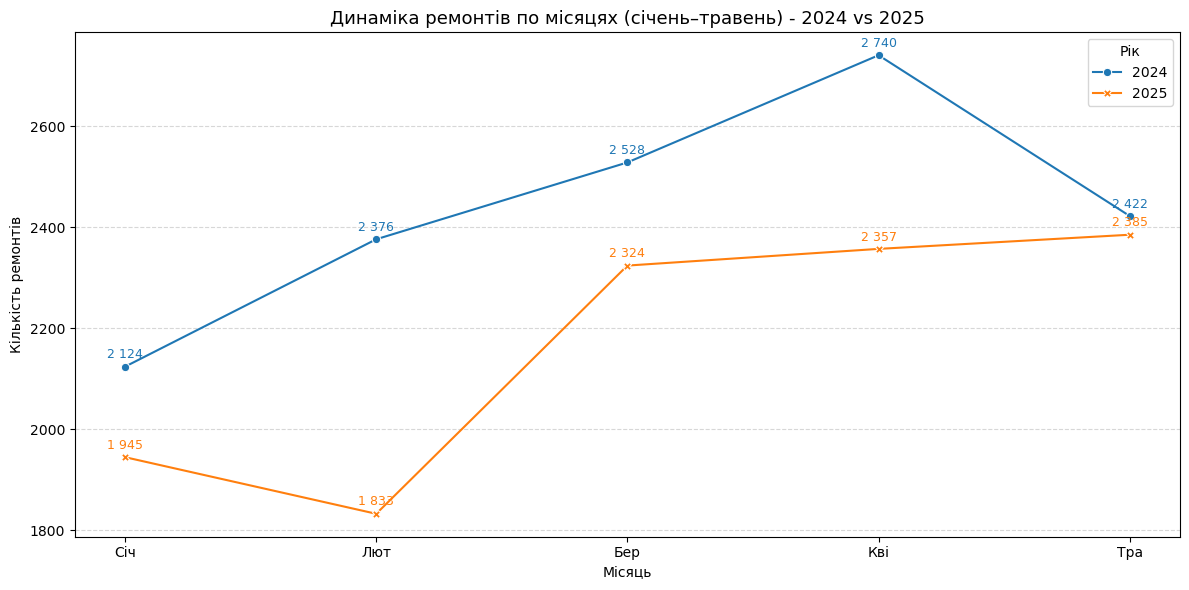

In [53]:
def format_number(value):
    return f'{value:,.0f}'.replace(',', ' ')


plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    data=pivot_data,
    x='місяць',
    y='кількість_ремонтів',
    hue='рік',
    style='рік',
    markers=True,
    dashes=False,
    palette='tab10'
)

for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        if not pd.isna(y):
            ax.annotate(
                format_number(y),
                xy=(x, y),
                xytext=(0, 6),
                textcoords='offset points',
                ha='center',
                fontsize=9,
                color=line.get_color()
            )
plt.title('Динаміка ремонтів по місяцях (січень–травень) - 2024 vs 2025', fontsize=13)
plt.xlabel('Місяць')
plt.ylabel('Кількість ремонтів')
plt.xticks([1, 2, 3, 4, 5], ['Січ', 'Лют', 'Бер', 'Кві', 'Тра'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Рік')
plt.tight_layout()
plt.show()

/var/folders/5f/274n6vts5536glrl00ns70mw0000gn/T/ipykernel_20012/1422751307.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


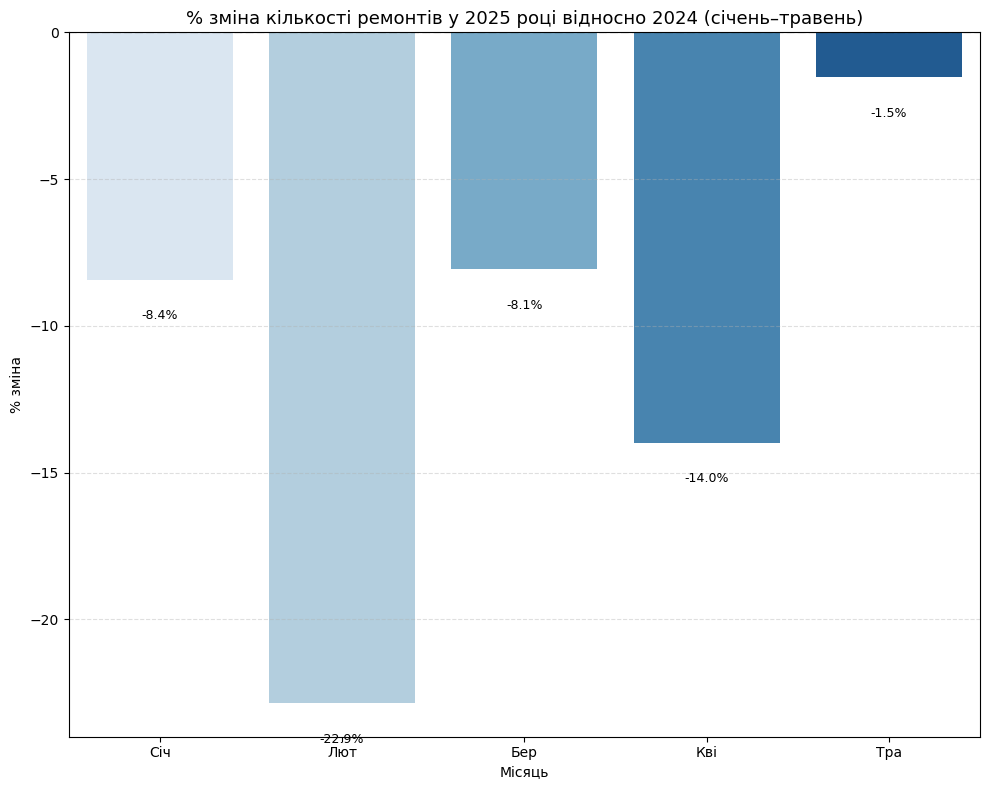

In [54]:
pivot_data_simple = ready_repairs[
    (ready_repairs['місяць'].between(1, 5)) &
    (ready_repairs['рік'].isin([2024, 2025]))
].groupby(['рік', 'місяць']).size().reset_index(name='кількість_ремонтів')


pivot_percent = pivot_data_simple.pivot(
    index='місяць', columns='рік', values='кількість_ремонтів').reset_index()
pivot_percent['%_зміна'] = (
    (pivot_percent[2025] - pivot_percent[2024]) / pivot_percent[2024]) * 100


plt.figure(figsize=(10, 8))
sns.barplot(
    data=pivot_percent,
    x='місяць',
    y='%_зміна',
    palette='Blues',
)


for index, row in pivot_percent.iterrows():
    plt.text(
        row.name,
        row['%_зміна'] + (1 if row['%_зміна'] >= 0 else -1),
        f"{row['%_зміна']:.1f}%",
        ha='center',
        va='bottom' if row['%_зміна'] >= 0 else 'top',
        fontsize=9
    )


plt.axhline(0, color='black', linestyle='--')
plt.title(
    '% зміна кількості ремонтів у 2025 році відносно 2024 (січень–травень)', fontsize=13)
plt.xlabel('Місяць')
plt.ylabel('% зміна')
plt.xticks([0, 1, 2, 3, 4], ['Січ', 'Лют', 'Бер', 'Кві', 'Тра'])
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

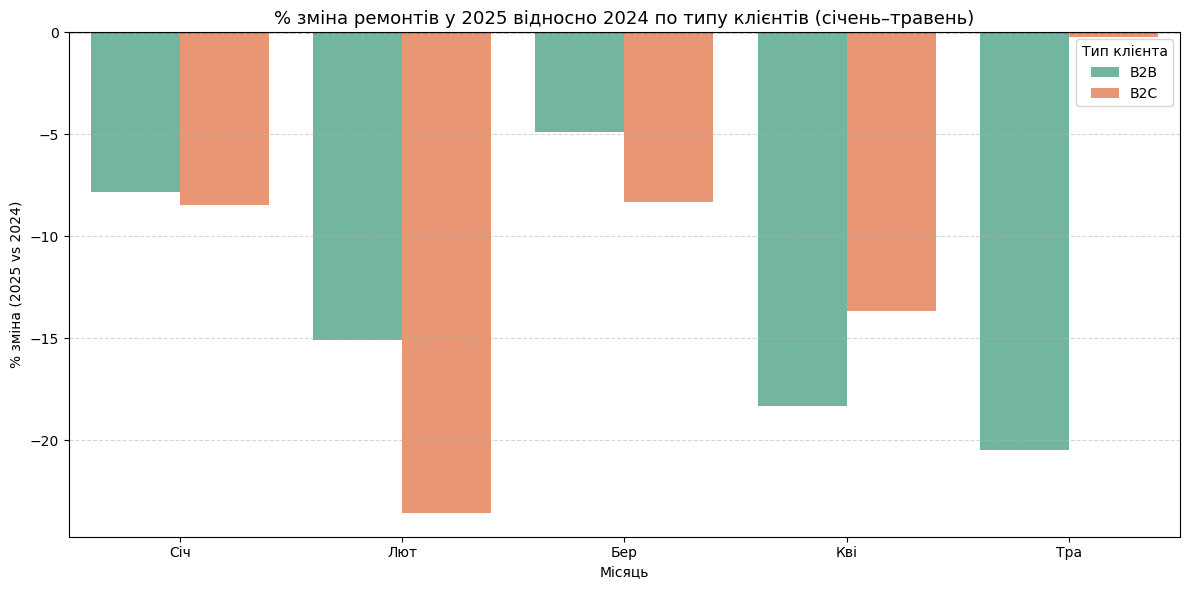

In [55]:
ready_repairs.loc[:, 'тип_клієнта'] = ready_repairs['корпоративний_клієнт'].map(
    {True: 'B2B', False: 'B2C'})


pivot_client = ready_repairs[
    (ready_repairs['місяць'].between(1, 5)) &
    (ready_repairs['рік'].isin([2024, 2025]))
].groupby(['тип_клієнта', 'рік', 'місяць']).size().reset_index(name='кількість_ремонтів')
# Групування по типу клієнта, року та місяцю


pivot_percent_clients = pivot_client.pivot(
    index=['тип_клієнта', 'місяць'], columns='рік', values='кількість_ремонтів').reset_index()
# Pivot-таблиця: місяць + тип клієнта → значення по роках

pivot_percent_clients['%_зміна'] = (
    (pivot_percent_clients[2025] - pivot_percent_clients[2024]) / pivot_percent_clients[2024]) * 100
# Обчислення % зміни

plt.figure(figsize=(12, 6))
sns.barplot(
    data=pivot_percent_clients,
    x='місяць',
    y='%_зміна',
    hue='тип_клієнта',
    palette='Set2'
)
# Побудова графіка


plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('% зміна ремонтів у 2025 відносно 2024 по типу клієнтів (січень–травень)', fontsize=13)
plt.xlabel('Місяць')
plt.ylabel('% зміна (2025 vs 2024)')
plt.xticks([0, 1, 2, 3, 4], ['Січ', 'Лют', 'Бер', 'Кві', 'Тра'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Тип клієнта')
plt.tight_layout()
plt.show()
# Оформлення

Висновки за період січень–травень (2024 vs 2025):
 1. Загальна динаміка ремонтів (Lineplot)
У 2025 році загальна кількість ремонтів залишається нижчою, ніж у 2024 протягом більшості місяців.

Виняток - січень, де відбулося суттєве зростання: +37,4%.

Починаючи з лютого, тренд негативний, хоча у травні відхилення майже нівельоване (-1,8%).

 2. Відсоткова зміна по місяцях (Barplot)
Найбільше зростання відбулося у січні (+37,4%), ймовірно, завдяки відкладеним ремонтам після новорічних свят або зростанню попиту.

З лютого по квітень - зниження кількості ремонтів на 10–17%, що може вказувати на:

загальне падіння активності,

зміну поведінки клієнтів (наприклад, збільшення термінів прийняття рішення),

або внутрішні затримки в обробці заявок.

 3. Порівняння B2B vs B2C
B2B-сегмент (корпоративні клієнти) показав найбільше зростання у січні: +69,4%, що значно перевищує показники B2C (+34,8%).

В лютому–квітні обидва сегменти мають негативну динаміку, але B2C просідає глибше, з піком падіння у квітні (-15,8%).

У травні - стабілізація: обидва типи клієнтів виходять майже на рівень 2024 року (B2B: +2,5%, B2C: -0,8%).

Сегмент B2B демонструє більшу стабільність і зростання в критичні місяці - варто інвестувати в корпоративні відносини, покращувати SLA та спрощувати процеси обслуговування.

B2C-клієнти вразливіші до коливань і потребують окремих маркетингових ініціатив, особливо в міжсезоння (лютий–квітень).

У 2025 році загальна кількість ремонтів трохи відстає від 2024, але тренд у травні демонструє потенціал на відновлення.

In [40]:
ready_repairs.loc[:, 'тривалість_днів'] = (
    ready_repairs['дата_видачі'] - ready_repairs['дата_створення']
).dt.days

/var/folders/5f/274n6vts5536glrl00ns70mw0000gn/T/ipykernel_20012/3450241749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ready_repairs.loc[:, 'тривалість_днів'] = (


In [41]:
avg_duration_by_service = (
    ready_repairs
    .groupby('послуга')['тривалість_днів']
    .mean()
    .reset_index()
    .sort_values(by='тривалість_днів', ascending=False)
    .round(2)
)

/var/folders/5f/274n6vts5536glrl00ns70mw0000gn/T/ipykernel_20012/1356625552.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


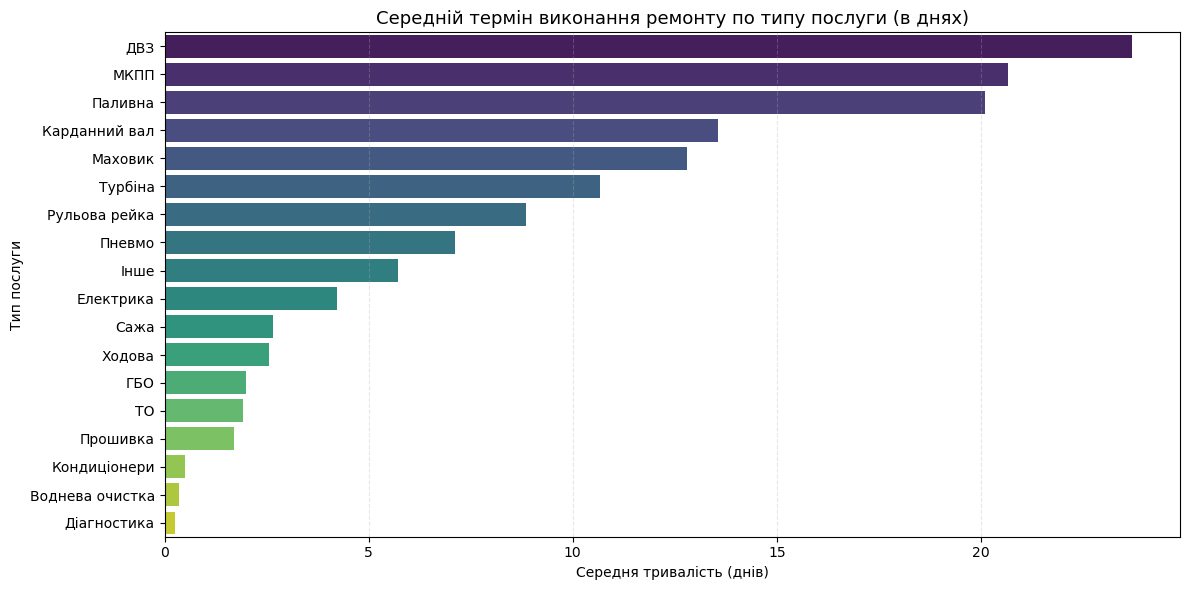

In [56]:

plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_duration_by_service,
    x='тривалість_днів',
    y='послуга',
    palette='viridis'
)


plt.title('Середній термін виконання ремонту по типу послуги (в днях)', fontsize=13)
plt.xlabel('Середня тривалість (днів)')
plt.ylabel('Тип послуги')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

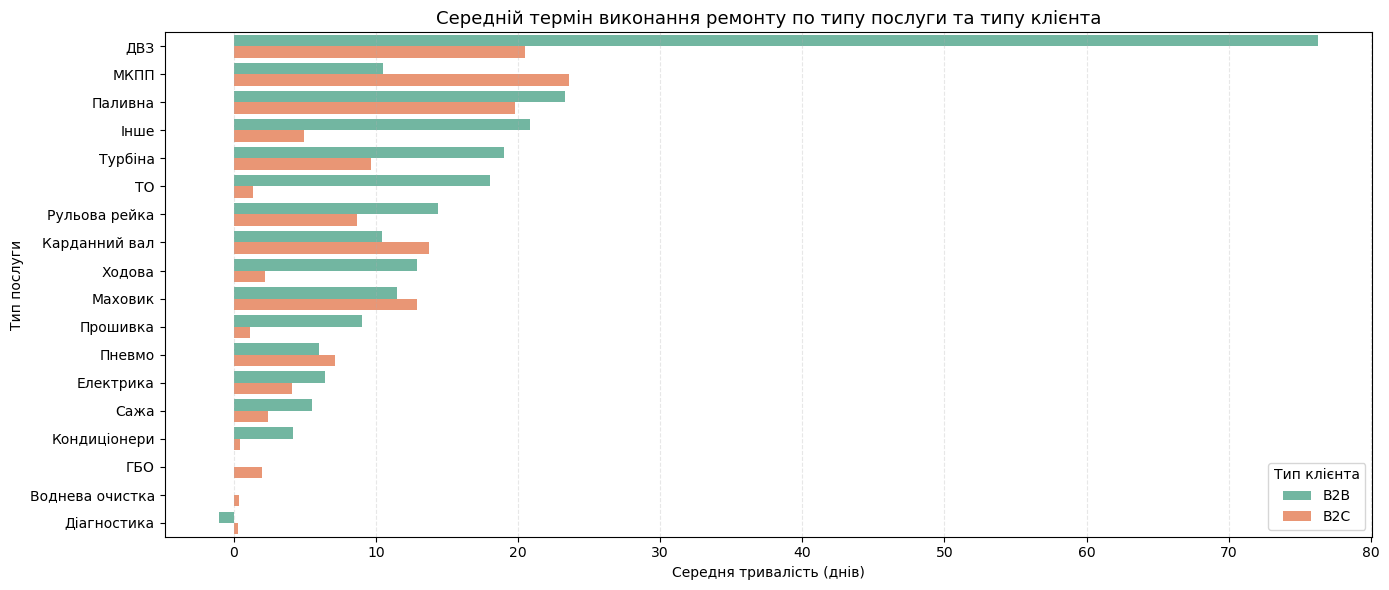

In [57]:
avg_duration_by_service_client = (
    ready_repairs
    .groupby(['послуга', 'тип_клієнта'])['тривалість_днів']
    .mean()
    .reset_index()
    .round(2)
    .sort_values('тривалість_днів', ascending=False)
)

plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=avg_duration_by_service_client,
    x='тривалість_днів',
    y='послуга',
    hue='тип_клієнта',
    palette='Set2'
)


plt.title(
    'Середній термін виконання ремонту по типу послуги та типу клієнта', fontsize=13)
plt.xlabel('Середня тривалість (днів)')
plt.ylabel('Тип послуги')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.legend(title='Тип клієнта')
plt.tight_layout()
plt.show()

**Висновки:** 
Аналіз середнього терміну виконання ремонту<br>
Найдовше виконуються складні агрегатні ремонти:<br>
ДВЗ, МКПП, паливна система, карданний вал - у середньому понад 15–20 днів;<br>
Це обумовлено як складністю, так і логістикою запчастин або дефіцитом кадрів.<br>
Швидко виконуються "простий" сервіс:<br>
ТО, кондиціонери, воднева очистка - 1–3 дні, що відповідає очікуваному SLA.<br>
Послуга "Діагностика" має аномально від'ємний термін виконання:<br>
Це вказує на ймовірне порушення процесу закриття ремонтів у CRM.<br>
Рекомендується детальніше перевірити протокол закриття таких угод - можливо, статус не оновлюється коректно.

**Різниця між B2B і B2C:**

Для деяких послуг (наприклад, "Рульова рейка", "Турбіна") термін виконання для B2B клієнтів суттєво більший.<br>
Це може бути пов’язано з погодженнями, логістикою або менш пріоритетною обробкою таких заявок.<br>
Водночас деякі послуги (наприклад, "Інше", "Паливна") - виконуються швидше для B2C.

**Рекомендації:**
Провести аудит CRM-процесів закриття ремонтів по "Діагностиці".<br>
Проаналізувати внутрішні затримки по B2B-клієнтах - зокрема для ДВЗ, МКПП та "Рульової рейки".<br>
Впровадити SLA-моніторинг з фокусом на послуги з перевищенням 10+ днів.

/var/folders/5f/274n6vts5536glrl00ns70mw0000gn/T/ipykernel_20012/2160939521.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


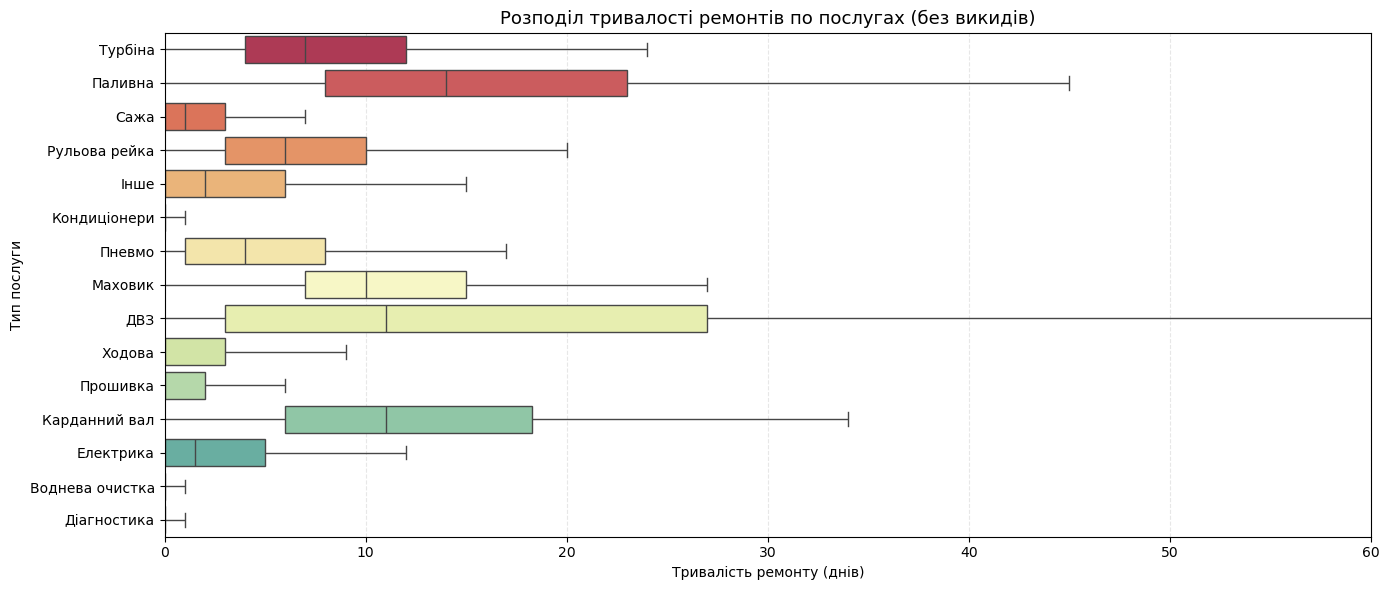

In [44]:
valid_services = (
    ready_repairs
    .groupby('послуга')
    .filter(lambda x: len(x) > 50)
)

# Boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=valid_services,
    x='тривалість_днів',
    y='послуга',
    palette='Spectral',
    showfliers=False  # прибираємо викиди
)

plt.title('Розподіл тривалості ремонтів по послугах (без викидів)', fontsize=13)
plt.xlabel('Тривалість ремонту (днів)')
plt.ylabel('Тип послуги')
plt.xlim(0, 60)  # обмеження масштабу
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### Аналіз розподілу тривалості ремонтів по послугах

Boxplot-графік демонструє значну **варіативність часу виконання ремонтів** для більшості послуг, навіть після виключення викидів. Зокрема:

- Для таких послуг, як **ДВЗ**, **Паливна**, **Карданний вал**, **Маховик**, **Турбіна**, спостерігається **широкий інтерквартильний розмах**, що свідчить про **нестабільність тривалості виконання**;
- **Медіана** в деяких категоріях зміщена в бік одного з країв, що може свідчити про **наявність системних затримок**;
- **Відсутність уніфікованих стандартів** у часі виконання схожих ремонтів може вказувати на **проблеми в процесах або управлінні**.

**Висновок**: Розкид у даних свідчить про **відсутність чітко регламентованих процесів** та **варіативність якості менеджменту на СТО**. Це зона для оптимізації - запровадження стандартів SLA та контроль термінів може суттєво покращити ефективність та задоволеність клієнтів.
